In [8]:
import tensorflow as tf
from IPython.display import Image, display

def get_class(image_path):                
    display(Image(filename=image_path))
    
    # Read in the image_data
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()

    # Loads label file, strips off carriage return
    label_lines = [line.rstrip() for line
                   in tf.gfile.GFile("/notebooks/coscup/part2/retrained_labels.txt")]

    # Unpersists graph from file
    with tf.gfile.FastGFile("/notebooks/coscup/part2/retrained_graph.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

    with tf.Session() as sess:
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor,
                               {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))


/notebooks/coscup/part2/photos_test/wildlife/318447023_3539044a5b.jpg


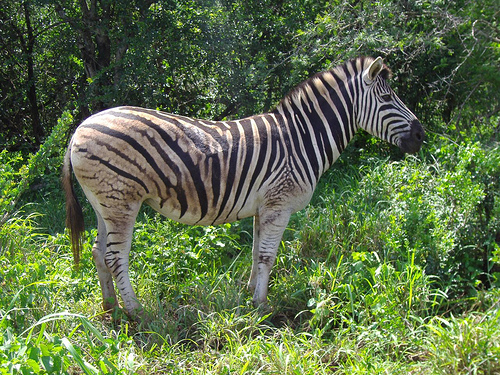

wildlife (score = 0.97338)
landscape (score = 0.01297)
folk (score = 0.00723)
portrait (score = 0.00642)


In [10]:
import os
import random

filesList = []
for dirPath, dirNames, fileNames in os.walk("/notebooks/coscup/part2/photos_test"):
    filesList += [os.path.join(dirPath, f) for f in fileNames if ".@__thumb" not in os.path.join(dirPath, f)]

target_file = random.choice(filesList)

print target_file

get_class(target_file)